<a href="https://colab.research.google.com/github/Timansamal046/Real-Estate-Analysys/blob/main/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re

In [ ]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [ ]:
df = pd.read_csv("/content/gurgaon_properties_cleaned_v1 (1).csv")

In [ ]:
df.duplicated().sum()

np.int64(122)

In [ ]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,ats tourmaline,sector 109,2.1,8123.0,2585.0,Super Built up area 2585(240.15 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.),3,4,3+,servant room,11.0,South-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


Area with type

In [ ]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
587,1.50,1337.0,Super Built up area 1337(124.21 sq.m.)Built Up area: 1330 sq.ft. (123.56 sq.m.)Carpet area: 1050 sq.ft. (97.55 sq.m.)
1569,1.75,1950.0,Built Up area: 1950 (181.16 sq.m.)
754,1.40,1750.0,Super Built up area 1750(162.58 sq.m.)Built Up area: 1466 sq.ft. (136.2 sq.m.)
703,3.50,1722.0,Plot area 160
3568,0.85,597.0,Built Up area: 597 (55.46 sq.m.)


In [ ]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [ ]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [ ]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [ ]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3037,1.12,flat,1567.0,Super Built up area 1572(146.04 sq.m.)Built Up area: 1325 sq.ft. (123.1 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1572.0,1325.0,1200.0
1483,0.99,flat,1260.0,Super Built up area 1260(117.06 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),1260.0,NaN,1000.0
2290,1.15,flat,1534.0,Super Built up area 1534(142.51 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),1534.0,NaN,1200.0
268,1.60,flat,2350.0,Carpet area: 2350 (218.32 sq.m.),NaN,NaN,2350.0
3239,0.46,flat,990.0,Built Up area: 990 (91.97 sq.m.),NaN,990.0,NaN


In [ ]:
df.duplicated().sum()

np.int64(122)

In [ ]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [ ]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
28,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
31,5.80,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
32,5.60,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
40,1.50,house,1980.0,Plot area 220(183.95 sq.m.),NaN,NaN,NaN
42,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN


In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]
all_nan_df.head()


,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
28,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
31,5.80,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
32,5.60,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
40,1.50,house,1980.0,Plot area 220(183.95 sq.m.),NaN,NaN,NaN
42,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN


In [ ]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [ ]:
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [ ]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)


In [ ]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
28,1.95,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
31,5.80,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
32,5.60,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
40,1.50,house,1980.0,Plot area 220(183.95 sq.m.),NaN,220.00,NaN
42,NaN,house,NaN,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
62,5.50,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
64,1.25,house,82781.0,Plot area 115(7692.86 sq.m.),NaN,115.00,NaN
67,0.80,house,100.0,Plot area 100(9.29 sq.m.),NaN,100.00,NaN
71,5.80,house,4518.0,Plot area 502(419.74 sq.m.),NaN,502.00,NaN
72,0.90,house,900.0,Plot area 900(83.61 sq.m.),NaN,900.00,NaN


In [ ]:
df.update(all_nan_df)

In [ ]:
df.isnull().sum()

,0
property_type,0
society,1
sector,0
price,18
price_per_sqft,18
area,18
areaWithType,0
bedRoom,0
bathroom,0
balcony,0


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,ats tourmaline,sector 109,2.10,8123.0,2585.0,Super Built up area 2585(240.15 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.),3,4,3+,servant room,11.0,South-East,1 to 5 Year Old,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2585.0,2100.0,NaN
1,flat,tarc maceo,sector 91,0.89,6339.0,1404.0,Super Built up area 1404(130.44 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3+,others,9.0,East,1 to 5 Year Old,"['Manish Gallexie 91', 'Dwarka Expressway', 'Rao Bharat Singh International School', 'Dronacharya College of Engineering', 'Silver Streak Multi Speciality Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Holiday Inn Sector 90', 'Manesar Golf Course', 'National Tennis Academy']","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff']",1404.0,NaN,1200.00
2,flat,emaar palm heights,sector 77,2.10,10370.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,3,"study room,servant room",17.0,NaN,Within 6 months,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Light', '1 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park']",2025.0,NaN,NaN
3,flat,mapsko mount ville,sector 79,1.20,8052.0,1490.0,Super Built up area 1490(138.43 sq.m.)Carpet area: 1163.91 sq.ft. (108.13 sq.m.),3,3,3,study room,9.0,South,1 to 5 Year Old,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Naurangpur Road', 'Delhi - Ajmer Expy', 'Bal Bharati Public School–IMT Manesar', 'Amity University Gurugram', 'Miracles Apollo Cradle / Spectra', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['3 Wardrobe', '5 Fan', '2 Geyser', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Soci

Additional Room

In [ ]:
df['additionalRoom'].value_counts()

,count
additionalRoom,
not available,1587
servant room,705
study room,250
others,225
pooja room,165
"study room,servant room",99
store room,99
"pooja room,servant room",82
"pooja room,study room,servant room,store room",72


In [ ]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [ ]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
945,servant room,0,1,0,0,0
279,"study room,servant room",1,1,0,0,0
505,not available,0,0,0,0,0
1858,not available,0,0,0,0,0
1594,others,0,0,0,0,1


Age Possession

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
1 to 5 Year Old,1676
5 to 10 Year Old,575
0 to 1 Year Old,530
undefined,332
10+ Year Old,310
Under Construction,90
Within 6 months,70
Within 3 months,26
Dec 2023,22


In [ ]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [ ]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [ ]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1676
New Property,626
Moderately Old,575
Undefined,333
Old Property,310
Under Construction,283


In [ ]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,ats tourmaline,sector 109,2.10,8123.0,2585.0,Super Built up area 2585(240.15 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.),3,4,3+,servant room,11.0,South-East,Relatively New,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2585.0,2100.0,NaN,0,1,0,0,0
1,flat,tarc maceo,sector 91,0.89,6339.0,1404.0,Super Built up area 1404(130.44 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3+,others,9.0,East,Relatively New,"['Manish Gallexie 91', 'Dwarka Expressway', 'Rao Bharat Singh International School', 'Dronacharya College of Engineering', 'Silver Streak Multi Speciality Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Holiday Inn Sector 90', 'Manesar Golf Course', 'National Tennis Academy']","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff']",1404.0,NaN,1200.00,0,0,0,0,1
2,flat,emaar palm heights,sector 77,2.10,10370.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,3,"study room,servant room",17.0,NaN,New Property,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Light', '1 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park']",2025.0,NaN,NaN,1,1,0,0,0
3,flat,mapsko mount ville,sector 79,1.20,8052.0,1490.0,Super Built up area 1490(138.43 sq.m.)Carpet area: 1163.91 sq.ft. (108.13 sq.m.),3,3,3,study room,9.0,South,Relatively New,"['Huda Metro Station (Gurugram)', 'Sapphire 83 Mall', 'Naurangpur Road', 'Delhi - Ajmer Expy', 'Bal Bharati Public School–IMT Manesar', 'Amity University Gurugram', 'Miracles Apollo Cradle / Spectra', 'Indira Gandhi Intl Airport', 'Garhi Harsaru Junction']","['3 Wardrobe', '5 Fan', '2 Geyser', '7 Light', '5 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'No open drainage around', 'Visitor Parking', 'Swimming Pool', '

FurnishDetails

In [ ]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
821,NaN,"['Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']"
1635,"['1 Water Purifier', '9 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '21 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '7 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1482,"['1 Wardrobe', '2 Fan', '1 Exhaust Fan', '1 Geyser', '1 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Maintenance Staff', 'Water Storage']"
1470,"['4 Wardrobe', '4 Geyser', '6 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
1222,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


In [ ]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [ ]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

<ipython-input-49-e4dadedf8e21>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [ ]:
furnishings_df.sample(5)

,Wardrobe,Sofa,Modular Kitchen,Fan,TV,Geyser,Curtains,Chimney,Bed,Water Purifier,Fridge,Exhaust Fan,Stove,AC,Light,Microwave,Dining Table,Washing Machine
3135,5,0,0,6,0,0,0,0,0,0,0,0,0,6,10,0,0,0
2339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2649,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1304,0,0,1,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0
3758,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0


In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

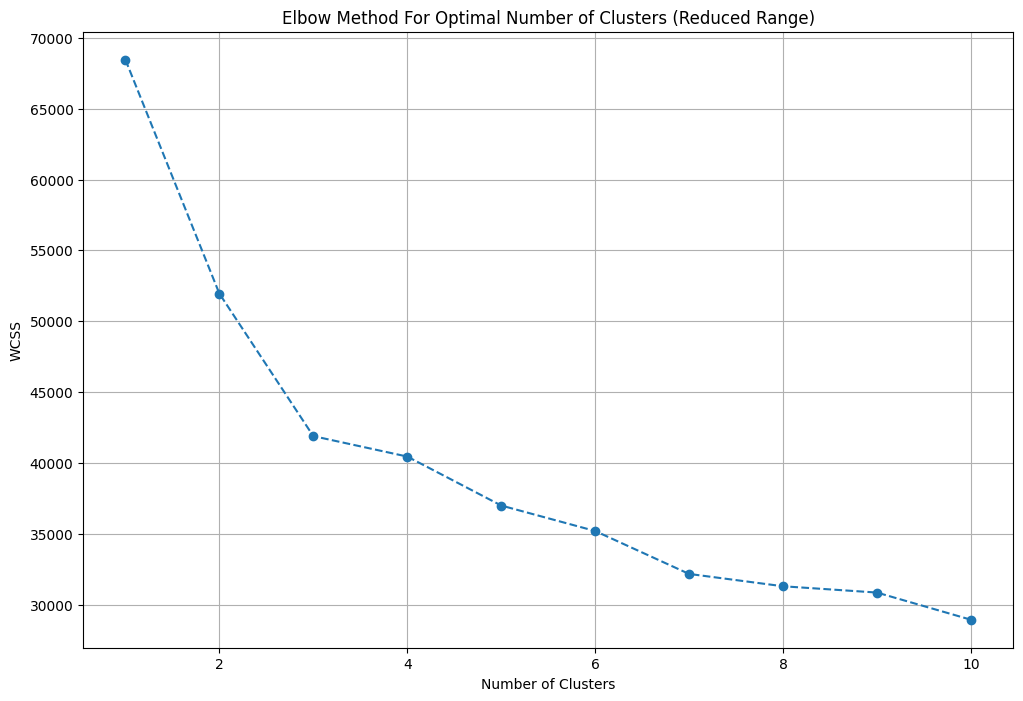

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [ ]:
df = df.iloc[:,:-18]

In [ ]:
df['furnishing_type'] = cluster_assignments

In [ ]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1098,"['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",1
3166,"['2 Wardrobe', '4 Fan', '2 Geyser', '1 Stove', '8 Light', '3 AC', '1 Modular Kitchen', '1 Curtains', '1 Chimney', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
2367,"['1 Water Purifier', '9 Fan', '1 Fridge', '1 Exhaust Fan', '12 Geyser', '1 Stove', '36 Light', '12 AC', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '7 Wardrobe', '1 Microwave', 'No Bed', 'No Dining Table', 'No Sofa', 'No TV', 'No Washing Machine']",0
3364,"['1 Stove', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2
2824,NaN,1


Features

In [ ]:
df[['society','features']].sample(5)

,society,features
3401,mvn athens,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting']"
2332,vatika seven elements,"['Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Swimming Pool', 'Park', 'Security Personnel', 'Fitness Centre / GYM', 'Club house / Community Center', 'Rain Water Harvesting']"
3340,ambience creacions,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2249,dlf city plots phase 2,"['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Security Personnel', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society']"
1828,pivotal devaan apartments,NaN


In [ ]:
df['features'].isnull().sum()

np.int64(635)

In [ ]:
import pandas as pd
app_df = pd.read_csv('/content/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [ ]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [ ]:
temp_df = df[df['features'].isnull()]

In [ ]:
temp_df.shape

(635, 26)

In [ ]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [ ]:
df.loc[temp_df.index,'features'] = x.values

In [ ]:
df['features'].isnull().sum()

np.int64(481)

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [ ]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [ ]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2079,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0
730,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1580,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
519,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
features_binary_df.shape

(3803, 130)

In [ ]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

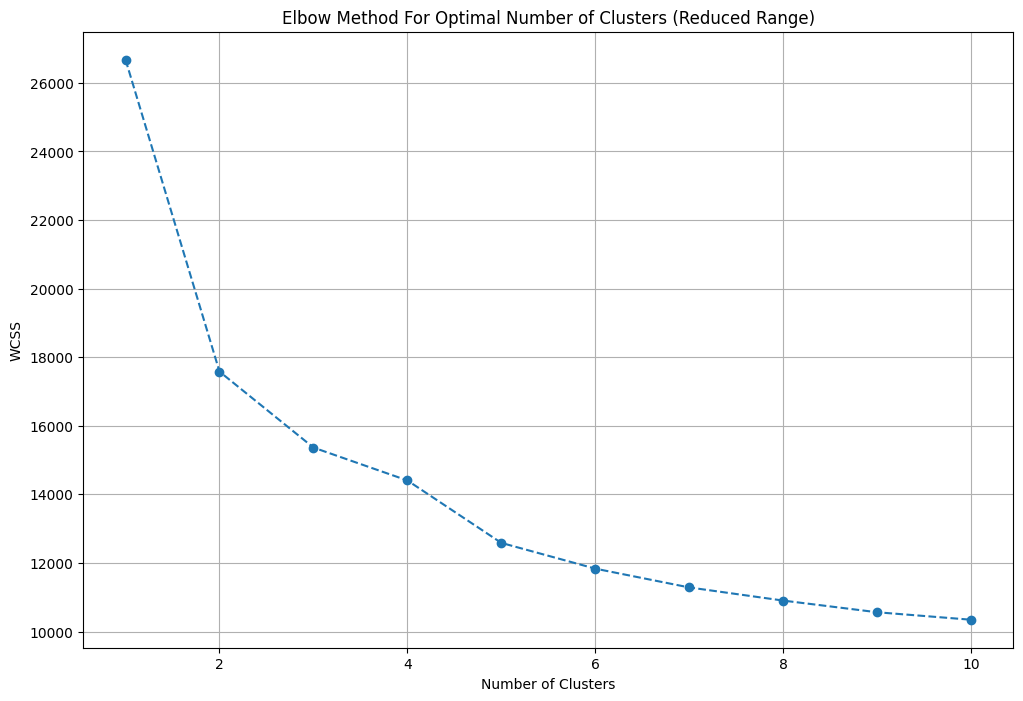

In [ ]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
     'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
      'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
     'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [ ]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,ats tourmaline,sector 109,2.10,8123.0,2585.0,Super Built up area 2585(240.15 sq.m.)Built Up area: 2100 sq.ft. (195.1 sq.m.),3,4,3+,servant room,11.0,South-East,Relatively New,"['Dwarka Sector 21 Metro Station', 'NeoSquare Mall', 'Dwarka Expressway', 'Euro International School', 'The NorthCap University', 'Metro Hospital, Palam Vihar', 'Indira Gandhi International Airport', 'Accenture DDC5', 'Hyatt Place Gurgaon Udyog Vihar', 'Hamoni Golf Camp', 'Nehru Stadium']","['3 Wardrobe', '7 Fan', '1 Exhaust Fan', '3 Geyser', '7 Light', '6 AC', '1 Modular Kitchen', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",2585.0,2100.0,NaN,0,1,0,0,0,2,"[Water purifier, Security / Fire Alarm, Power Back-up, Feng Shui / Vaastu Compliant, Private Garden / Terrace, Intercom Facility, Lift(s), High Ceiling Height, Maintenance Staff, False Ceiling Lighting, Water Storage, Separate entry for servant room, No open drainage around, Bank Attached Property, Piped-gas, Internet/wi-fi connectivity, Recently Renovated, Visitor Parking, Swimming Pool, Park, Security Personnel, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal, Rain Water Harvesting, Water softening plant, Shopping Centre, Fitness Centre / GYM, Club house / Community Center]",165
1,flat,tarc maceo,sector 91,0.89,6339.0,1404.0,Super Built up area 1404(130.44 sq.m.)Carpet area: 1200 sq.ft. (111.48 sq.m.),2,2,3+,others,9.0,East,Relatively New,"['Manish Gallexie 91', 'Dwarka Expressway', 'Rao Bharat Singh International School', 'Dronacharya College of Engineering', 'Silver Streak Multi Speciality Hospital', 'Indira Gandhi International Airport', 'IMT Manesar', 'Holiday Inn Sector 90', 'Manesar Golf Course', 'National Tennis Academy']","['2 Wardrobe', '5 Fan', '1 Exhaust Fan', '1 Geyser', '4 Light', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Maintenance Staff']",1404.0,NaN,1200.00,0,0,0,0,1,2,"[Intercom Facility, Lift(s), Maintenance Staff]",13
2,flat,emaar palm heights,sector 77,2.10,10370.0,2025.0,Super Built up area 2025(188.13 sq.m.),3,3,3,"study room,servant room",17.0,NaN,New Property,"['DLF Cyber City', 'Vatika Town Square', ""St. Xavier's High School"", 'Matrikiran School', 'Arvy Hospital', 'DPS']","['1 Light', '1 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Lift(s)', 'Park']",2025.0,NaN,NaN,1,1,0,0,0,1,"[Lift(s), Park]",8
3,flat,mapsko mount ville,sector 79,1.20,8052.0,1490.0,Super Built up area 1490(138.43 sq.m.)Carpet area: 1163.91 sq.ft. (108.13 sq.m.),3,3,3,study room,9.0,S

In [ ]:

# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [ ]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
420,house,bhim nagar society,sector 6,0.40,2500.0,1600.0,Built Up area: 1600 (148.64 sq.m.)Carpet area: 800 sq.ft. (74.32 sq.m.),4,2,2,1.0,East,Undefined,NaN,1600.0,800.0,0,0,0,0,0,1,0
1548,flat,mahindra aura,sector 110 a,1.80,8814.0,2042.0,Super Built up area 2042(189.71 sq.m.)Built Up area: 1850 sq.ft. (171.87 sq.m.)Carpet area: 1650 sq.ft. (153.29 sq.m.),3,3,3+,7.0,South-East,Relatively New,2042.0,1850.0,1650.0,0,1,0,0,0,2,136
1908,flat,dlf the primus,sector 82a,1.80,13846.0,1300.0,Super Built up area 1818(168.9 sq.m.)Carpet area: 1300 sq.ft. (120.77 sq.m.),3,3,3+,10.0,North-East,Relatively New,1818.0,NaN,1300.0,0,1,0,0,0,0,174
2594,flat,sare crescent parc,sector 92,0.82,5384.0,1523.0,Built Up area: 1523 (141.49 sq.m.),3,3,3+,12.0,West,Undefined,NaN,1523.0,NaN,0,0,0,0,0,1,0
3745,flat,ss the leaf,sector 85,1.84,7641.0,2408.0,Super Built up area 2408(223.71 sq.m.)Carpet area: 1685 sq.ft. (156.54 sq.m.),3,4,3,8.0,South-East,Relatively New,2408.0,NaN,1685.0,0,0,0,1,0,1,158


In [ ]:
df.shape

(3803, 23)

In [ ]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)